<a href="https://colab.research.google.com/github/maryandy2002/maryandy2002/blob/main/Nodos_de_Chebyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nodos de Chebyshev
---
Los nodos de Chebyshev son puntos especiales utilizados comúnmente en interpolación numérica, especialmente para minimizar el error de interpolación polinómica y evitar el fenómeno de Runge.

Para obtener $n$ nodos sobre un itervalo $[a,b]$ se utiliza la siguiente expresión:
$x_k=\frac{a+b}{2}+\frac{b-a}{2}̇̇cos(\frac{k\pi}{n}), k=0,1,...,n$

con este método, los nodos que se obtienen se concentran a los extremos del intervalo dado, lo que nops permite evitar el fenómeno de Runge


In [18]:
import math as mt
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [16]:
def chebyshev(a,b,n):
  x=[]
  for i in range(1,n+1):
    x.append(round((((a+b)/2)+(((b-a)/2)*mt.cos(((2*i-1)*mt.pi)/(2*n)))),5))
  return x

In [20]:
def lagrange(a,b):
  x=sp.symbols("x")
  l=[]
  t=1
  d=1
  f=0
  for i in range(len(a)):
   for j in range(len(a)):
    if i!=j:
     t*=(x-a[j])
     d*=(a[i]-a[j])
     t=sp.expand(t)
   l.append(t/d)
   t=1
   d=1

  for i in range(len(a)):
   f+=l[i]*b[i]

  gf=sp.lambdify(x,f,'numpy')
  xx=np.linspace(min(a),max(a),1000)
  yf=gf(xx)

  return xx,yf

x


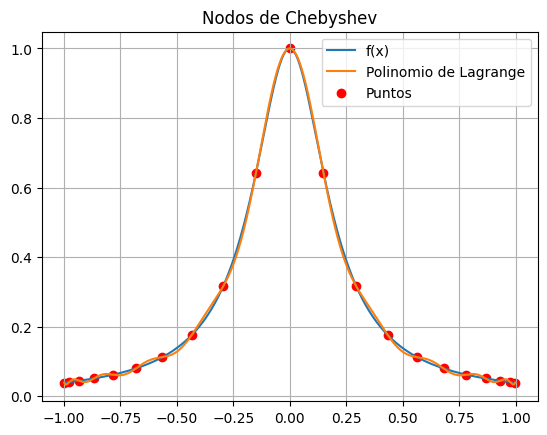

In [23]:
x=sp.symbols("x")
f=1/(1+25*(x)**2)
ff = sp.lambdify(x, f, 'numpy')

x_i=chebyshev(-1,1,21)
print(x)
f_i=[]
for i in range(len(x_i)):
  f_i.append(ff(x_i[i]))

xl,yl=lagrange(x_i,f_i)

xx = np.linspace(min(x_i), max(x_i), 1000)
yf = ff(xx)
plt.plot(xx, yf,linestyle="-" ,label='f(x)')
plt.plot(xl, yl,linestyle="-" ,label='Polinomio de Lagrange')
plt.scatter(x_i, f_i, color='red', label='Puntos')
plt.title('Nodos de Chebyshev')
plt.grid(True)
plt.legend()
plt.show()